In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib as mpl


from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier
from sklearn.svm import LinearSVC
from sklearn.ensemble import VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import VotingClassifier

from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.datasets import fetch_openml
import joblib
from collections import Counter

## Download the dataset

In [166]:
#Loads and divides the data into X, y
mnist = fetch_openml('mnist_784', version=1, cache=True, as_frame=False)

X = mnist["data"]
y = mnist["target"].astype(np.uint8)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\datasets\_openml.py:1002: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [167]:
# Splits the data into smaller sample for faster GridSearch
X_train = X[:5000]
y_train = y[:5000]
X_val = X[5000:6000]
y_val = y[5000:6000]
X_test = X[6000:7000]
y_test = y[6000:7000]

In [141]:
print(X_train.shape)
print(y_train.shape)
print(X_val.shape)
print(y_val.shape)
print(X_test.shape)
print(y_test.shape)


(5000, 784)
(5000,)
(1000, 784)
(1000,)
(1000, 784)
(1000,)


In [57]:
def display_confusion_matrix(y_test, y_pred):
    cm = confusion_matrix(y_test, y_pred)
    ConfusionMatrixDisplay(cm).plot()

## EDA

In [38]:
print(mnist.DESCR)

**Author**: Yann LeCun, Corinna Cortes, Christopher J.C. Burges  
**Source**: [MNIST Website](http://yann.lecun.com/exdb/mnist/) - Date unknown  
**Please cite**:  

The MNIST database of handwritten digits with 784 features, raw data available at: http://yann.lecun.com/exdb/mnist/. It can be split in a training set of the first 60,000 examples, and a test set of 10,000 examples  

It is a subset of a larger set available from NIST. The digits have been size-normalized and centered in a fixed-size image. It is a good database for people who want to try learning techniques and pattern recognition methods on real-world data while spending minimal efforts on preprocessing and formatting. The original black and white (bilevel) images from NIST were size normalized to fit in a 20x20 pixel box while preserving their aspect ratio. The resulting images contain grey levels as a result of the anti-aliasing technique used by the normalization algorithm. the images were centered in a 28x28 image b

In [134]:
label_counts = Counter(y)

# Print the count of data points for each category
for label, count in label_counts.items():
    print(f"Category {label}: {count} data points")

Category 5: 6313 data points
Category 0: 6903 data points
Category 4: 6824 data points
Category 1: 7877 data points
Category 9: 6958 data points
Category 2: 6990 data points
Category 3: 7141 data points
Category 6: 6876 data points
Category 7: 7293 data points
Category 8: 6825 data points


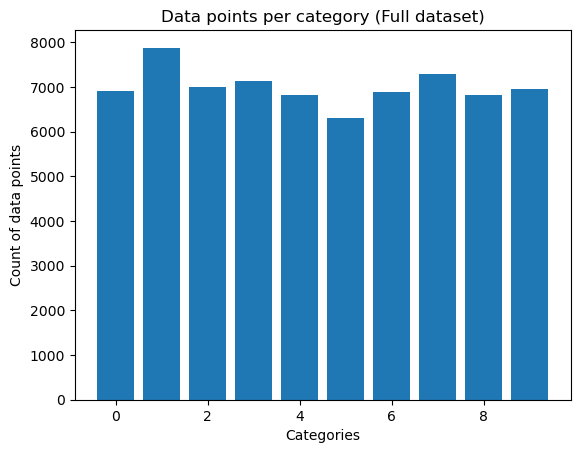

In [136]:
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.bar(labels, counts)
plt.xlabel("Categories")
plt.ylabel("Count of data points")
plt.title("Data points per category (Full dataset)")
plt.show()

In [142]:
label_counts = Counter(y_train)

# Print the count of data points for each category
for label, count in label_counts.items():
    print(f"Category {label}: {count} data points")

Category 5: 434 data points
Category 0: 479 data points
Category 4: 535 data points
Category 1: 563 data points
Category 9: 495 data points
Category 2: 488 data points
Category 3: 493 data points
Category 6: 501 data points
Category 7: 550 data points
Category 8: 462 data points


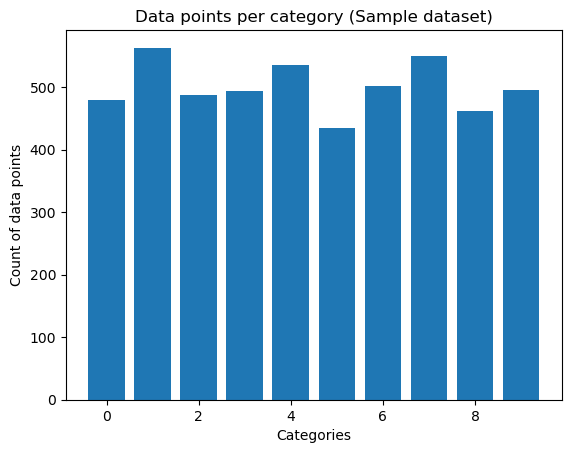

In [143]:
labels = list(label_counts.keys())
counts = list(label_counts.values())

plt.bar(labels, counts)
plt.xlabel("Categories")
plt.ylabel("Count of data points")
plt.title("Data points per category (Sample dataset)")
plt.show()

In [74]:
# The first label ("true answer") is 5.
print(y[0])

5


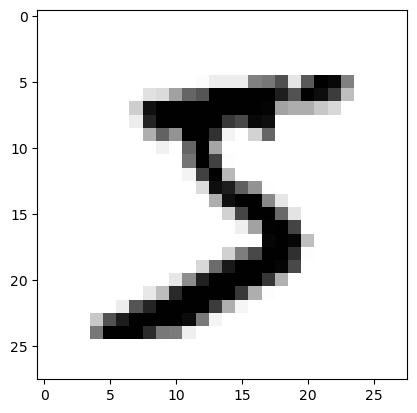

In [76]:
# Plotting the features of the X data, it looks like a 5.
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap=mpl.cm.binary)

In [77]:
X[0]

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.,   0.,   0.,   

## Grid Search for all models

### LinearSVC

In [6]:
#LinearSVC
svm_clf = LinearSVC(max_iter=100, random_state=42)
hyper_param_grid_svm_clf = [
    {"C" : np.linspace(0.00001,10,15)}
]

grid_search_cv_svm_clf = GridSearchCV(svm_clf, hyper_param_grid_svm_clf, n_jobs = -1)
grid_search_cv_svm_clf.fit(X_train, y_train)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


GridSearchCV(estimator=LinearSVC(max_iter=100, random_state=42), n_jobs=-1,
             param_grid=[{'C': array([1.000000e-05, 7.142950e-01, 1.428580e+00, 2.142865e+00,
       2.857150e+00, 3.571435e+00, 4.285720e+00, 5.000005e+00,
       5.714290e+00, 6.428575e+00, 7.142860e+00, 7.857145e+00,
       8.571430e+00, 9.285715e+00, 1.000000e+01])}])

In [7]:
grid_search_cv_svm_clf.best_params_

{'C': 1e-05}

In [16]:
grid_search_cv_svm_clf.best_score_

0.8698

### RandomForestClassifier

In [8]:
#RandomForestClassifier
random_forest_clf = RandomForestClassifier(n_jobs= -1, random_state=42)
hyper_param_grid_rf_clf = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 'log2', None],
    'bootstrap': [True, False]
}

grid_search_cv_rf_clf = GridSearchCV(random_forest_clf, hyper_param_grid_rf_clf, n_jobs=-1)
grid_search_cv_rf_clf.fit(X_train, y_train)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
820 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 637, in _validate_p

GridSearchCV(estimator=RandomForestClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'max_features': ['auto', 'sqrt', 'log2', None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]})

In [10]:
grid_search_cv_rf_clf.best_params_

{'bootstrap': False,
 'max_depth': None,
 'max_features': 'log2',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 200}

In [15]:
grid_search_cv_rf_clf.best_score_


0.9418

### ExtraTreesClassifier

In [17]:
#ExtraTreesClassifier
extra_trees_clf = ExtraTreesClassifier(n_jobs= -1, random_state=42)
hyper_param_grid_et_clf = {
    'n_estimators': [50, 100, 200],
    'min_samples_split': [1, 3, 9],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_cv_et_clf = GridSearchCV(extra_trees_clf, hyper_param_grid_et_clf, n_jobs=-1)
grid_search_cv_et_clf.fit(X_train, y_train)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
90 fits failed out of a total of 270.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
90 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py", line 732, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 1144, in wrapper
    estimator._validate_params()
  File "C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\base.py", line 637, in _validate_param

GridSearchCV(estimator=ExtraTreesClassifier(n_jobs=-1, random_state=42),
             n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [1, 3, 9],
                         'n_estimators': [50, 100, 200]})

In [18]:
grid_search_cv_et_clf.best_params_

{'bootstrap': False,
 'min_samples_leaf': 1,
 'min_samples_split': 3,
 'n_estimators': 200}

In [19]:
grid_search_cv_et_clf.best_score_

0.9406000000000001

### KNeighborsClassifier

In [20]:
# KNeighborsClassifier
k_neighbors_clf = KNeighborsClassifier(n_jobs= -1)
hyper_param_grid_knn_clf = {
    'n_neighbors': [3, 5, 7, 9, 11],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search_cv_knn_clf = GridSearchCV(k_neighbors_clf, hyper_param_grid_knn_clf, n_jobs=-1)
grid_search_cv_knn_clf.fit(X_train, y_train)

GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1), n_jobs=-1,
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': [3, 5, 7, 9, 11],
                         'weights': ['uniform', 'distance']})

In [21]:
grid_search_cv_knn_clf.best_params_

{'metric': 'euclidean', 'n_neighbors': 3, 'weights': 'distance'}

In [22]:
grid_search_cv_knn_clf.best_score_

0.9342

### LogisticRegression

In [23]:
# LogisticRegression
logreg = LogisticRegression(n_jobs= -1)
hyper_param_grid_logreg = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear', 'saga'], 
    'max_iter': [100, 200, 300]            
}

grid_search_cv_logreg = GridSearchCV(logreg, hyper_param_grid_logreg, n_jobs=-1)
grid_search_cv_logreg.fit(X_train, y_train)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\linear_model\_sag.py:350: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


GridSearchCV(estimator=LogisticRegression(n_jobs=-1), n_jobs=-1,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'max_iter': [100, 200, 300], 'penalty': ['l1', 'l2'],
                         'solver': ['liblinear', 'saga']})

In [24]:
grid_search_cv_logreg.best_params_

{'C': 0.01, 'max_iter': 100, 'penalty': 'l1', 'solver': 'saga'}

In [25]:
grid_search_cv_logreg.best_score_

0.8934000000000001

### VotingClassifier

In [29]:
#VotingClassifier
named_estimators = [
    ("svm_clf", grid_search_cv_svm_clf),
    ("random_forest_clf", grid_search_cv_rf_clf),
    ("extra_trees_clf", grid_search_cv_et_clf),
    ("k_neighbors_clf",grid_search_cv_knn_clf),
    ("log_reg",grid_search_cv_logreg)
]

voting_clf = VotingClassifier(named_estimators)
voting_clf.fit(X_train, y_train)

C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\svm\_classes.py:32: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\svm\_base.py:1242: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
C:\Users\erikf\anaconda3\envs\Machine_Learning\lib\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
1080 fits failed out of a total of 4320.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
433 fits failed with the following error:
Traceback (most recent call last):
  

VotingClassifier(estimators=[('svm_clf',
                              GridSearchCV(estimator=LinearSVC(max_iter=100,
                                                               random_state=42),
                                           n_jobs=-1,
                                           param_grid=[{'C': array([1.000000e-05, 7.142950e-01, 1.428580e+00, 2.142865e+00,
       2.857150e+00, 3.571435e+00, 4.285720e+00, 5.000005e+00,
       5.714290e+00, 6.428575e+00, 7.142860e+00, 7.857145e+00,
       8.571430e+00, 9.285715e+00, 1.000000e+01])}])),
                             ('random_for...
                              GridSearchCV(estimator=KNeighborsClassifier(n_jobs=-1),
                                           n_jobs=-1,
                                           param_grid={'metric': ['euclidean',
                                                                  'manhattan',
                                                                  'minkowski'],
                                                       'n_neighbors': [3, 5, 7,
                                                                       9, 11],
                                                       'weights': ['uniform',
                                                                   'distance']})),
                             ('log_reg',
                              GridSearchCV(estimator=LogisticRegression(n_jobs=-1),
                                           n_jobs=-1,
                                           param_grid={'C': [0.001, 0.01, 0.1,
                                                             1, 10, 100],
                                                       'max_iter': [100, 200,
                                                                    300],
                                                       'penalty': ['l1', 'l2'],
                                                       'solver': ['liblinear',
                                                                  'saga']}))])

In [32]:
voting_clf.score(X_val, y_val)

0.946

### The KNeighborsClassifier hade the best accuracy score

### Testing the test data on the KNeighborsClassifier

In [157]:
y_pred = grid_search_cv_knn_clf.predict(X_test)
knn_clf_score = accuracy_score(y_test, y_pred)
knn_clf_score

0.916

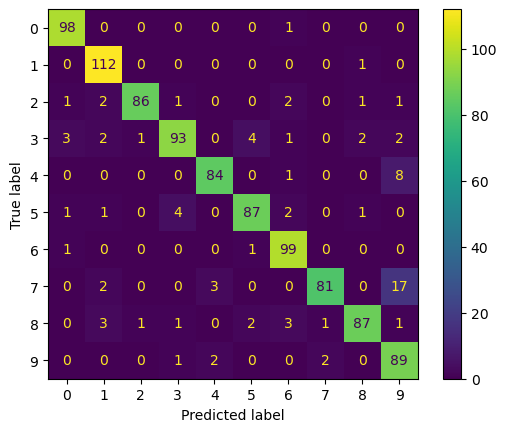

In [158]:
display_confusion_matrix(y_test, y_pred)

## Training the KNeighborsClassifier on the whole dataset

In [157]:
X.shape

(70000, 784)

In [158]:
y.shape

(70000,)

In [159]:
X_train = X[:60000]
y_train = y[:60000]
X_test = X[60000:70000]
y_test = y[60000:70000]

In [160]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(60000, 784)
(60000,)
(10000, 784)
(10000,)


In [114]:
# # ##########################
# # # SAVE-LOAD using joblib  only needs to be done once
# # ##########################
# import joblib
# # save
# joblib.dump(grid_search_cv_knn_clf, r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Färdiga\knn_clf_model.pkl") 


In [168]:
# load model
knn_clf = joblib.load(r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Färdiga\knn_clf_model.pkl")

knn_clf.score(X_test, y_test)

1.0

In [66]:
y_pred = knn_clf.predict(X_test)
knn_clf_score = accuracy_score(y_test, y_pred)
knn_clf_score

0.9717

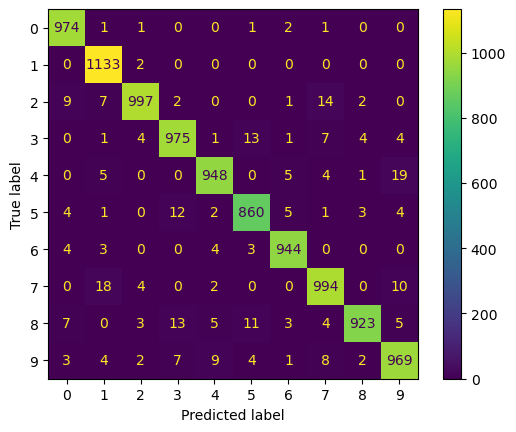

In [68]:
display_confusion_matrix(y_test, y_pred)

In [69]:
#trying to find specific numbers 
print(y[20:100])

[4 0 9 1 1 2 4 3 2 7 3 8 6 9 0 5 6 0 7 6 1 8 7 9 3 9 8 5 9 3 3 0 7 4 9 8 0
 9 4 1 4 4 6 0 4 5 6 1 0 0 1 7 1 6 3 0 2 1 1 7 9 0 2 6 7 8 3 9 0 4 6 7 4 6
 8 0 7 8 3 1]


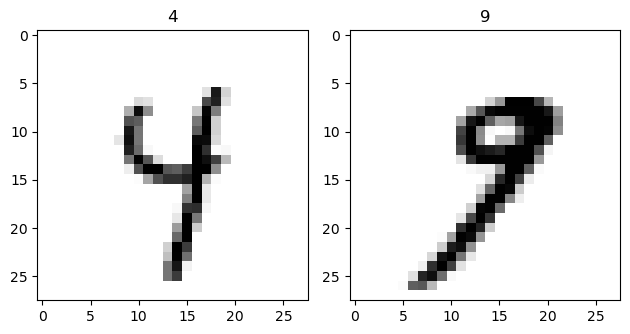

In [97]:
#Ploting a 4 and a 9 to see if they look similar 
# 4
some_digit = X[26]
some_digit_image = some_digit.reshape(28, 28)

# 9
some_digit_2 = X[33]
some_digit_image_2 = some_digit_2.reshape(28, 28)

# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2)

# Plot the 4
axes[0].imshow(some_digit_image, cmap=mpl.cm.binary)
axes[0].set_title("4")

# Plot the 9
axes[1].imshow(some_digit_image_2, cmap=mpl.cm.binary)
axes[1].set_title("9")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

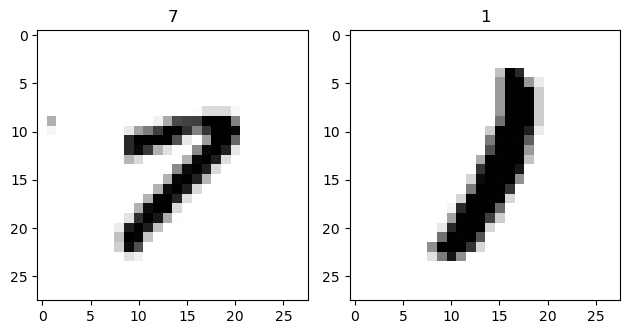

In [102]:
#Ploting a 7 and a 1 to see if they look similar 
# 7
some_digit_3 = X[29]
some_digit_image_3 = some_digit_3.reshape(28, 28)

# 1
some_digit_4 = X[78]
some_digit_image_4 = some_digit_4.reshape(28, 28)

# Create a figure and two subplots side by side
fig, axes = plt.subplots(1, 2)

#plot the 7
axes[0].imshow(some_digit_image_3,cmap=mpl.cm.binary)
axes[0].set_title("7")

#plot the 1
axes[1].imshow(some_digit_image_4,cmap=mpl.cm.binary)
axes[1].set_title("1")

# Adjust layout for better spacing
plt.tight_layout()

# Show the plots
plt.show()

## Testing the model on my own images

In [26]:
import cv2

# Loading the sample images
file_1 = r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Bilder_kunskapskontroll_2\IMG_3352_4.jpg"
test_image_1 = cv2.imread(file_1, cv2.IMREAD_GRAYSCALE)

file_2 = r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Bilder_kunskapskontroll_2\IMG_3354_4.jpg"
test_image_2 = cv2.imread(file_2, cv2.IMREAD_GRAYSCALE)

file_3 = r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Bilder_kunskapskontroll_2\IMG_3355_4.jpg"
test_image_3 = cv2.imread(file_3, cv2.IMREAD_GRAYSCALE)

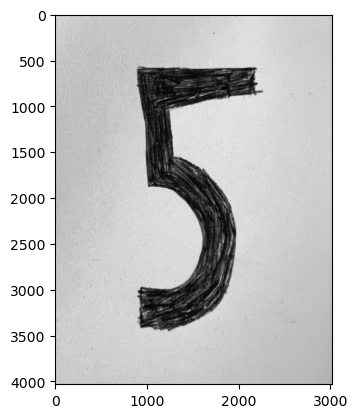

In [27]:
#imported image
plt.imshow(test_image_1, cmap='gray')

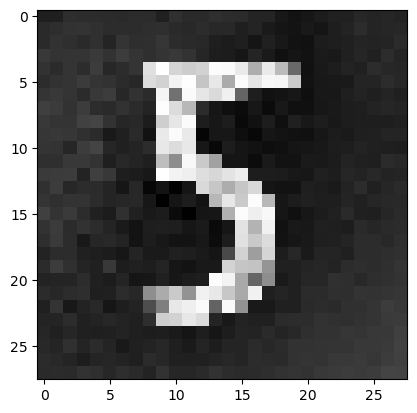

In [169]:
#Imported transfomed image
img_resized_1 = cv2.resize(test_image_1, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_1 = cv2.bitwise_not(img_resized_1)

plt.imshow(img_resized_1, cmap='gray')

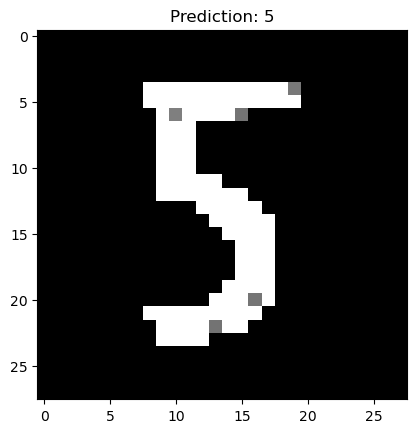

In [162]:
img_resized_1 = cv2.resize(test_image_1, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_1 = cv2.bitwise_not(img_resized_1)
reshaped_image = img_resized_1.reshape(1, -1)

#Turnes pixels with a value under 100 to 0
#Pixels with a value between 100 and 130 stays the same
#Pixels with a value above 130 turns to 255
lower_pixel = 100
upper_pixel = 130

for i in range(img_resized_1.shape[0]):
    for j in range(img_resized_1.shape[1]):
        if img_resized_1[i, j] <= lower_pixel:
            img_resized_1[i, j] = 0
        elif img_resized_1[i, j] > upper_pixel:
            img_resized_1[i, j] = 255

# Assuming 'knn_clf' is your trained KNN classifier
prediction = knn_clf.predict(reshaped_image)

plt.imshow(img_resized_1, cmap='gray')
plt.title(f"Prediction: {prediction[0]}")
plt.show()

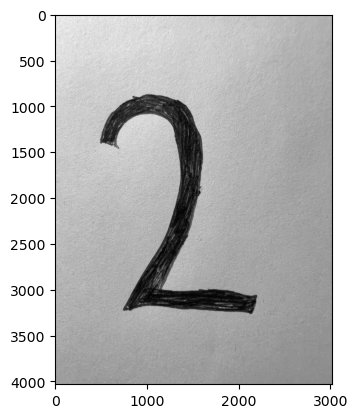

In [32]:
plt.imshow(test_image_2, cmap='gray')

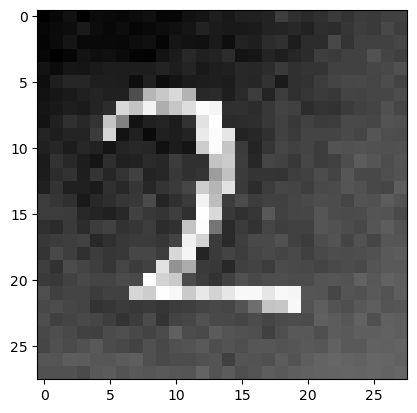

In [153]:
img_resized_2 = cv2.resize(test_image_2, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_2 = cv2.bitwise_not(img_resized_2)

plt.imshow(img_resized_2, cmap='gray')

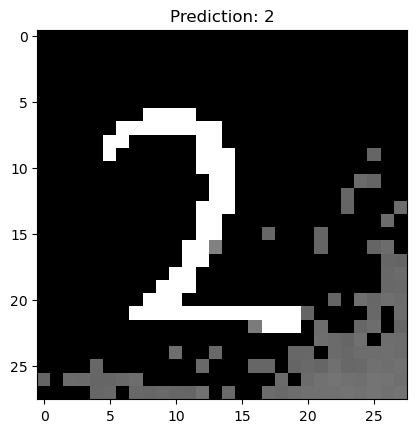

In [151]:
test_image_2 = cv2.imread(file_2, cv2.IMREAD_GRAYSCALE)

img_resized_2 = cv2.resize(test_image_2, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_2 = cv2.bitwise_not(img_resized_2)
reshaped_image_2 = flattened_image_2.reshape(1, -1)


lower_pixel = 100
upper_pixel = 130

for i in range(img_resized_2.shape[0]):
    for j in range(img_resized_2.shape[1]):
        if img_resized_2[i, j] <= lower_pixel:
            img_resized_2[i, j] = 0
        elif img_resized_2[i, j] > upper_pixel:
            img_resized_2[i, j] = 255

# Assuming 'knn_clf' is your trained KNN classifier
prediction = knn_clf.predict(reshaped_image_2)

plt.imshow(img_resized_2, cmap='gray')
plt.title(f"Prediction: {prediction[0]}")
plt.show()

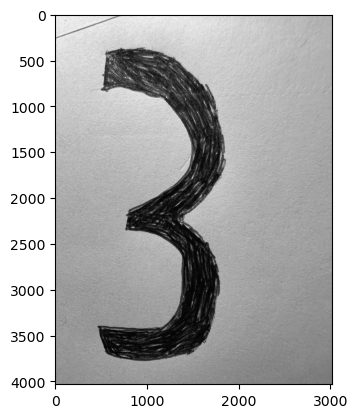

In [36]:
plt.imshow(test_image_3, cmap='gray')

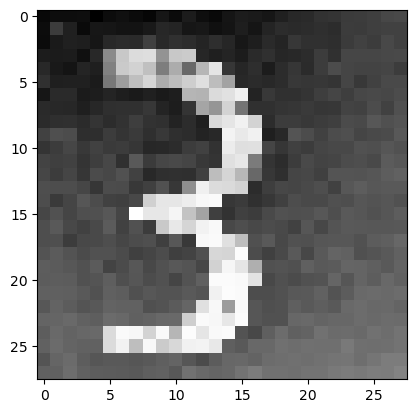

In [149]:
img_resized_3 = cv2.resize(test_image_3, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_3 = cv2.bitwise_not(img_resized_3)

plt.imshow(img_resized_3, cmap='gray')

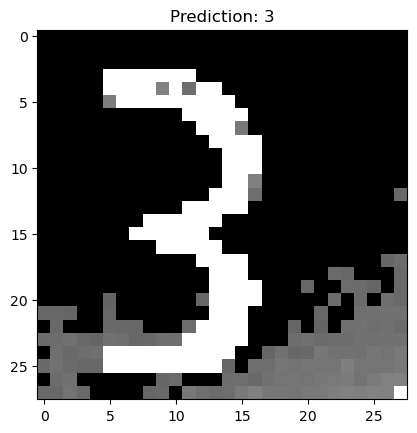

In [147]:
test_image_3 = cv2.imread(file_3, cv2.IMREAD_GRAYSCALE)

img_resized_3 = cv2.resize(test_image_3, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_3 = cv2.bitwise_not(img_resized_3)
reshaped_image_3 = flattened_image_3.reshape(1, -1)


lower_pixel = 100
upper_pixel = 130

for i in range(img_resized_3.shape[0]):
    for j in range(img_resized_3.shape[1]):
        if img_resized_3[i, j] <= lower_pixel:
            img_resized_3[i, j] = 0
        elif img_resized_3[i, j] > upper_pixel:
            img_resized_3[i, j] = 255

# Assuming 'knn_clf' is your trained KNN classifier
prediction = knn_clf.predict(reshaped_image_3)

plt.imshow(img_resized_3, cmap='gray')
plt.title(f"Prediction: {prediction[0]}")
plt.show()

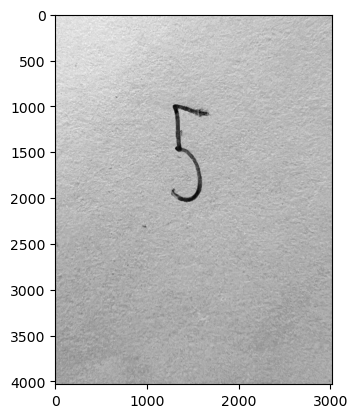

In [163]:
# Showing a bad image and the transformed bad image 

#Original image
file_4 = r"C:\Users\erikf\ec\Machine Learning\Kunskapskontroll\Bilder_kunskapskontroll_2\IMG_3342_1.jpg"
test_image_4 = cv2.imread(file_4, cv2.IMREAD_GRAYSCALE)
plt.imshow(test_image_4, cmap='gray')

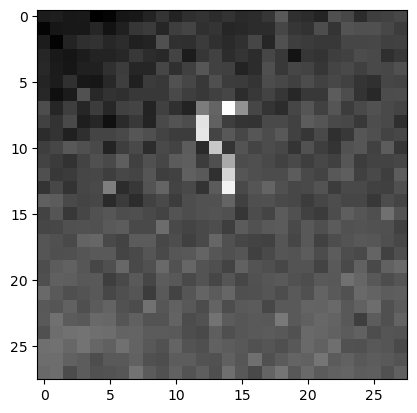

In [165]:
#Transformed bad image without background nois
img_resized_4 = cv2.resize(test_image_4, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_4 = cv2.bitwise_not(img_resized_4)

plt.imshow(img_resized_4, cmap='gray')

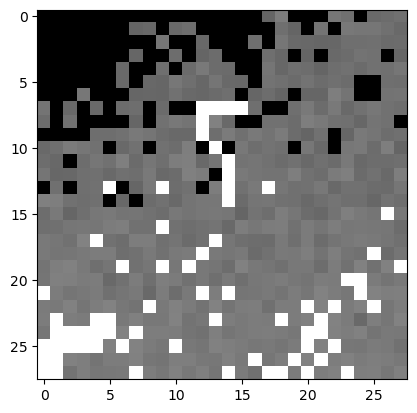

In [144]:
#Transformed bad image with background nois elimination
img_resized_4 = cv2.resize(test_image_4, (28, 28), interpolation=cv2.INTER_LINEAR)
img_resized_4 = cv2.bitwise_not(img_resized_4)
flattened_image_4 = img_resized_4.flatten()
reshaped_image_4 = flattened_image_4.reshape(1, -1)

plt.imshow(img_resized_4, cmap='gray')
lower_pixel = 100
upper_pixel = 130

for i in range(img_resized_4.shape[0]):
    for j in range(img_resized_4.shape[1]):
        if img_resized_4[i, j] <= lower_pixel:
            img_resized_4[i, j] = 0
        elif img_resized_4[i, j] > upper_pixel:
            img_resized_4[i, j] = 255

plt.imshow(img_resized_4, cmap='gray')
plt.show()